## House Price Practice

#### This is the Dxplortary Data Analysis for House Price data set (from Kaggle)

#### 1. import package

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
pd.set_option("display.max_columns",100)

#### 2. Read the Data

In [5]:
df_train = pd.read_csv('../HousePrice/train.csv')

#### 3. Examine the Data

In [4]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.shape

(1460, 81)

#### column names

In [6]:
df_train.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [6]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

#### 4. Examine missing

In [49]:
pd.DataFrame(df_train.isnull().any(),columns = ['Missing Any'])

,Missing Any
Id,False
MSSubClass,False
MSZoning,False
LotFrontage,True
LotArea,False
Street,False
Alley,True
LotShape,False
LandContour,False
Utilities,False


In [53]:
missing_total = pd.DataFrame(df_train.isnull().sum().sort_values(ascending=False),columns = ["total"])
missing_total

,total
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [54]:
missing_percent = pd.DataFrame((df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False), columns = ["Percent"])
missing_percent

,Percent
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
FireplaceQu,0.472603
LotFrontage,0.177397
GarageCond,0.055479
GarageType,0.055479
GarageYrBlt,0.055479
GarageFinish,0.055479


In [64]:
missing_summary = pd.concat([missing_percent,missing_total],axis=1)
missing_summary

,Percent,total
PoolQC,0.995205,1453
MiscFeature,0.963014,1406
Alley,0.937671,1369
Fence,0.807534,1179
FireplaceQu,0.472603,690
LotFrontage,0.177397,259
GarageCond,0.055479,81
GarageType,0.055479,81
GarageYrBlt,0.055479,81
GarageFinish,0.055479,81


#### Alley has many missing

In [10]:
isNA=df_train.isnull()
df_train[isNA['Alley'] == "False"]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [11]:
df_train[isNA[['Alley']].any(axis=1)].shape

(1369, 81)

In [12]:
df_train['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

#### 5. Outliers

In [105]:
scaler = preprocessing.StandardScaler().fit(df_train[['SalePrice']])
scaler.mean_
Standardized =  scaler.transform(df_train[['SalePrice']])
low = Standardized[Standardized[:,0].argsort()][:10]
high = Standardized[Standardized[:,0].argsort()][10:]
low

array([[-1.83870376],
       [-1.83352844],
       [-1.80092766],
       [-1.78329881],
       [-1.77448439],
       [-1.62337999],
       [-1.61708398],
       [-1.58560389],
       [-1.58560389],
       [-1.5731    ]])

In [106]:
high

array([[-1.54153178],
       [-1.52264373],
       [-1.52264373],
       ...,
       [ 5.59185509],
       [ 7.10289909],
       [ 7.22881942]])

In [120]:
data = df_train[['Id','SalePrice','GrLivArea']]
GrLivArea_scaled = StandardScaler().fit_transform(df_train['GrLivArea'][:,np.newaxis]);
low_range = GrLivArea_scaled[GrLivArea_scaled[:,0].argsort()][:10]
high_range= GrLivArea_scaled[GrLivArea_scaled[:,0].argsort()][-10:]
high_range

array([[3.35719585],
       [3.57802188],
       [3.67701286],
       [3.7645818 ],
       [3.98350416],
       [4.01967394],
       [5.3313044 ],
       [5.63589203],
       [6.01662656],
       [7.85557436]])

In [121]:
data.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,SalePrice,GrLivArea
1298,1299,160000,5642
523,524,184750,4676


In [122]:
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

#### 6. explore SalePrice

In [13]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

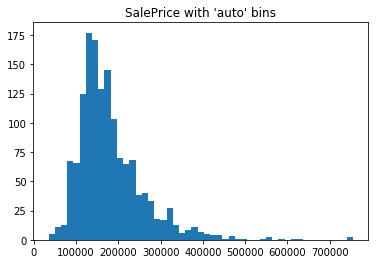

In [14]:
 _ = plt.hist(df_train['SalePrice'], bins='auto')  # arguments are passed to np.histogram
plt.title("SalePrice with 'auto' bins")
plt.show()

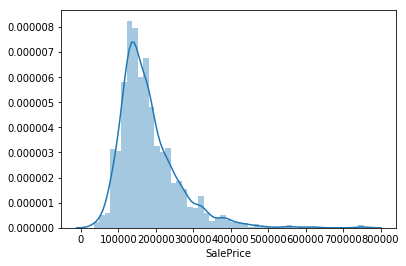

In [15]:
sns.distplot(df_train['SalePrice'])

In [ ]:
#### Skewness, right skewed

In [78]:
df_train['SalePrice'].skew()

1.8828757597682129

In [79]:
df_train['SalePrice'].kurt()

6.536281860064529

#### relationship with GrLivArea

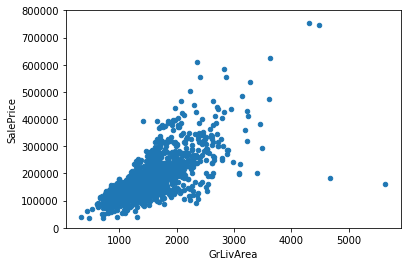

In [16]:
data = df_train[['SalePrice','GrLivArea']]
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000))

#### relationship with TotalBsmtSF

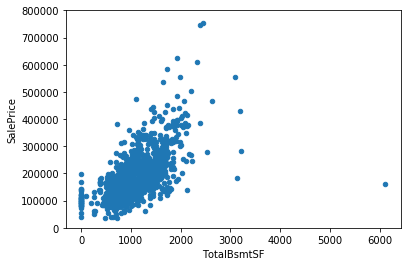

In [17]:
data = df_train[['SalePrice','TotalBsmtSF']]
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000))

#### relationship with OverallQual

In [18]:
average_saleprice_by_overallqual = df_train.groupby('OverallQual')['SalePrice'].sum() \
/df_train.groupby('OverallQual')['SalePrice'].count()
average_saleprice_by_overallqual

OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64

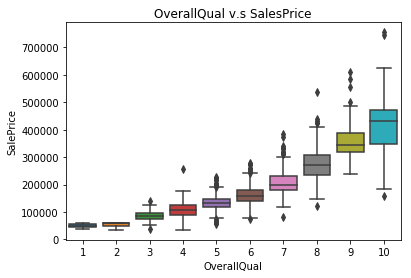

In [20]:
data = df_train[['SalePrice','OverallQual']]
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data).set_title("OverallQual v.s SalesPrice")

#### Relationship with YearBuilt

In [22]:
df_train['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

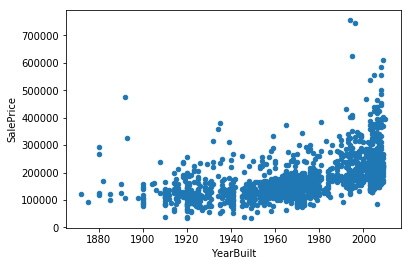

In [24]:
data = df_train[['YearBuilt','SalePrice']]
data.plot.scatter(x='YearBuilt',y='SalePrice')

#### 7. fill in missing

In [133]:
df_train["PoolQC"] = df_train["PoolQC"].fillna("None")
df_train["MiscFeature"] = df_train["MiscFeature"].fillna("None")
df_train["Alley"] = df_train["Alley"].fillna("None")
df_train["Fence"] = df_train["Fence"].fillna("None")
df_train["FireplaceQu"] = df_train["FireplaceQu"].fillna("None")

#### fill in LotFrontage by each Neighborhood

In [134]:
df_train['LotFrontage'] = df_train.groupby('Neighborhood')['LotFrontage'].transform(
lambda x: x.fillna(x.median()))

In [137]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_train[col] = df_train[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_train[col] = df_train[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_train[col] = df_train[col].fillna('None')
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)
df_train['MSZoning'] = df_train['MSZoning'].fillna(df_train['MSZoning'].mode()[0])

In [ ]:
all_data = all_data.drop(['Utilities'], axis=1)

#### 8. Assumption Check

#### Normality

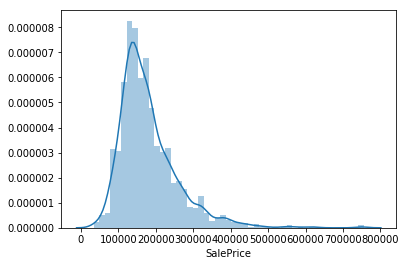

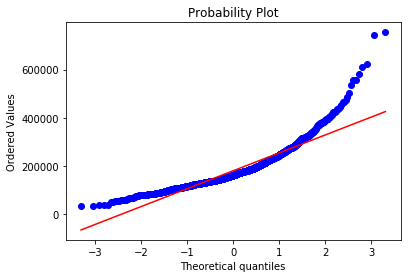

In [128]:
sns.distplot(df_train['SalePrice'])
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

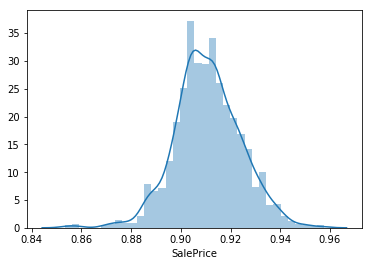

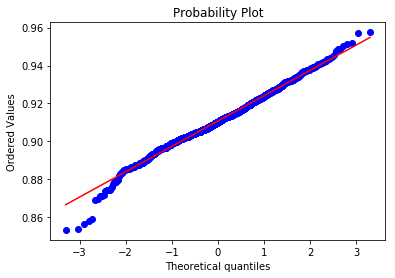

In [131]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])
sns.distplot(df_train['SalePrice'])
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'],plot=plt)